In [8]:
#import the package
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [92]:
#define the file path
bass_file= 'Dataset/nsynth-train/audio/string_acoustic_000-024-025.wav'

#Store class names in array
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal']
#Store source names in array
source_names=['acoustic', 'electronic', 'synthetic']


#load the waveform y and sampling rate s
y, sr = librosa.load(bass_file, sr=None)
print(y)
print(sr)

hop_length = 512

[-6.1035156e-05 -3.9672852e-04  2.8381348e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
16000


In [93]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)
S = np.abs(librosa.stft(y))

#Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, 
                                                 fmax = 8000)
#Mel-Frequency Cepstral Coefficients (MFCC) features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
#First-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

#Root Mean Square:
rms = librosa.feature.rms(S=S)

#Spectrogram
spec = librosa.amplitude_to_db(S, ref=np.max)

#Chromagraph analysis
#STFT chroma features from the harmonic signal
chroma_stft = librosa.feature.chroma_stft(y=y,
                                        sr=sr)
#Constant Q chroma features from the harmonic signal
chroma_cq = librosa.feature.chroma_cqt(y=y,
                                        sr=sr)
#Chroma Energy Normalized (CENS)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

#Spectral Analysis:
#Compute the centroid 
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
#Spectral Bandwidth
spec_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#Spectral Contrast
spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
#Spectral Flatness
spec_flatness = librosa.feature.spectral_flatness(y=y)
#Spectral rolloff
spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

#Poly Features
p0 = librosa.feature.poly_features(S=S, order=0)
p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(S=S, order=2)

#Zero Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)

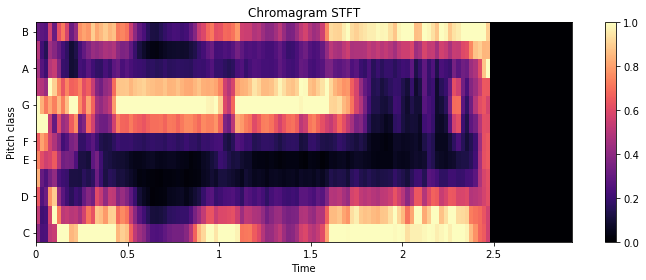

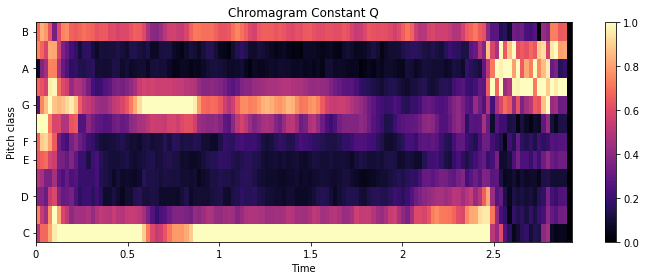

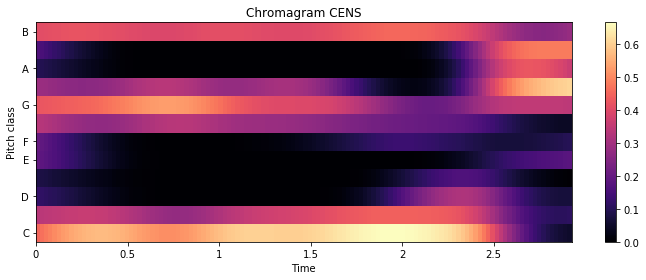

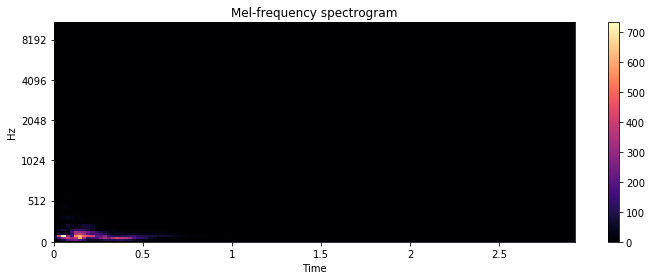

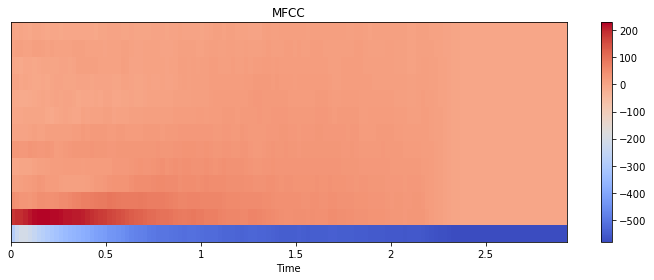

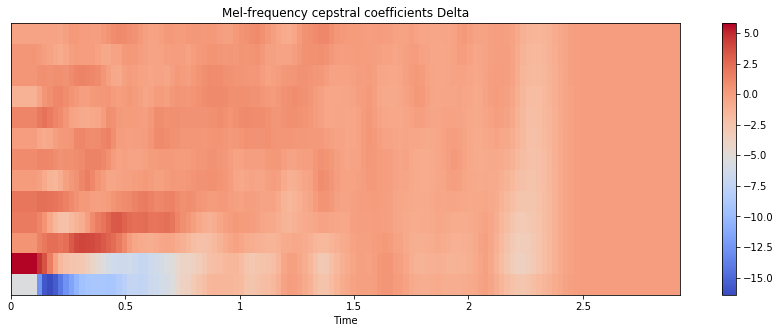

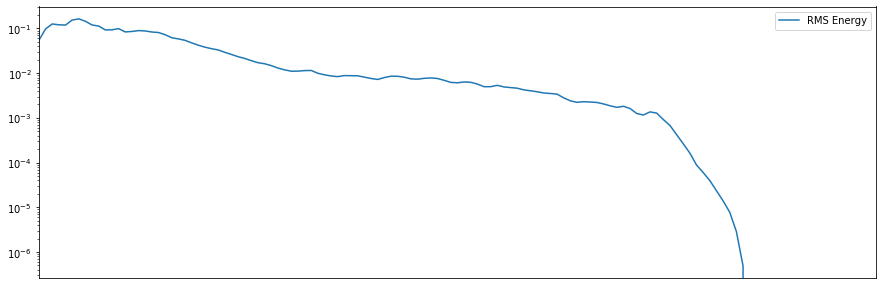

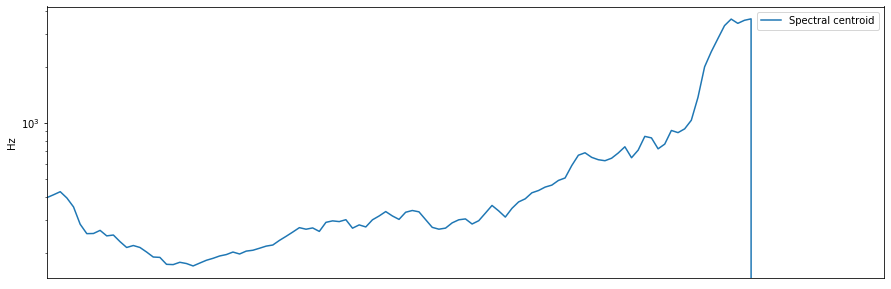

In [95]:
#Plot Chroma Graphs
index = 0
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram STFT')
plt.tight_layout()
plt.show()

index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.title('Chromagram Constant Q')
plt.colorbar()
plt.tight_layout()
plt.show()

index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.title('Chromagram CENS')
plt.colorbar()
plt.tight_layout()
plt.show()

#Plot Mel frequency Spectrogram
index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(mel_spec, x_axis='time',y_axis='mel')
plt.colorbar()
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(mfcc_delta, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients Delta')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.show()


index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(spec_centroid.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_centroid.shape[-1]])
plt.legend()
plt.show()


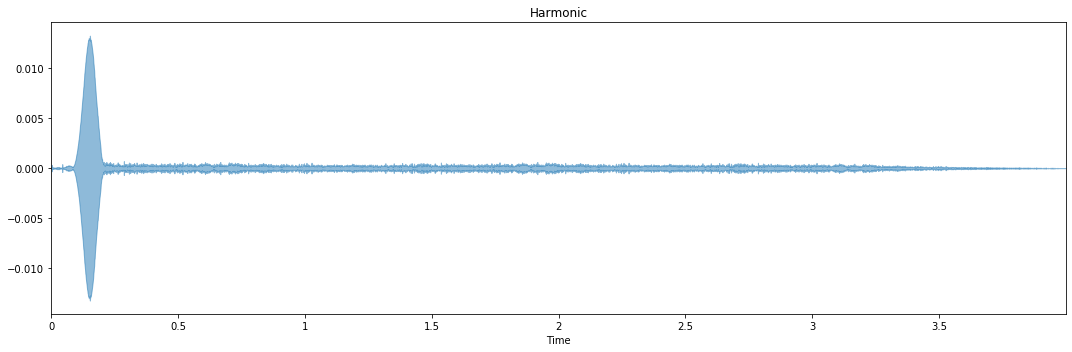

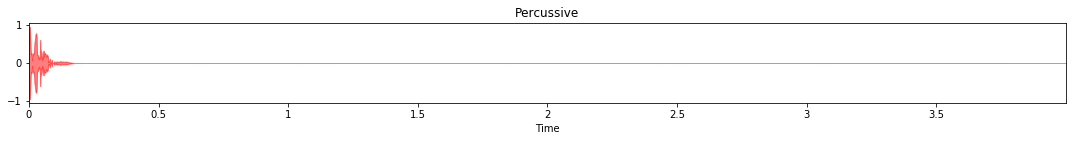

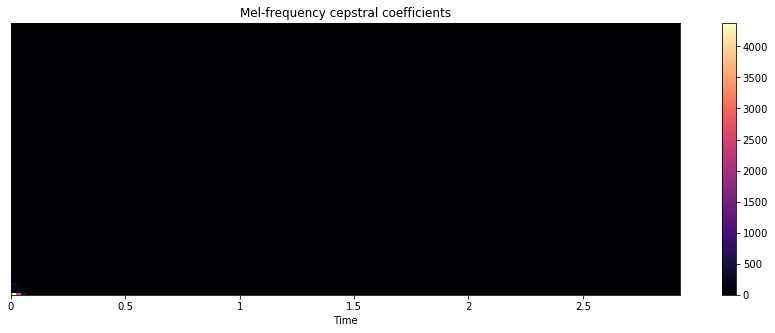

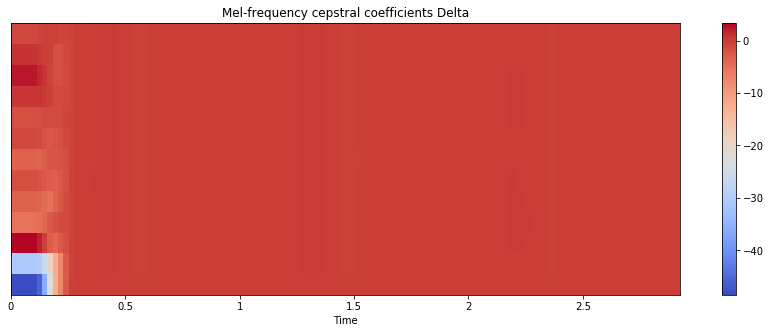

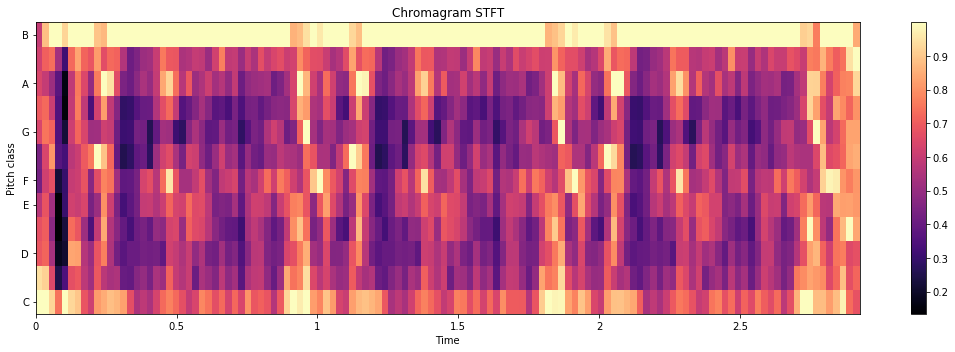

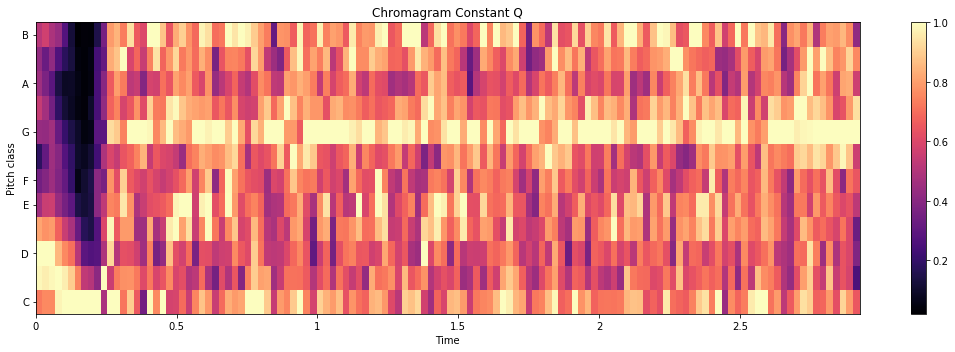

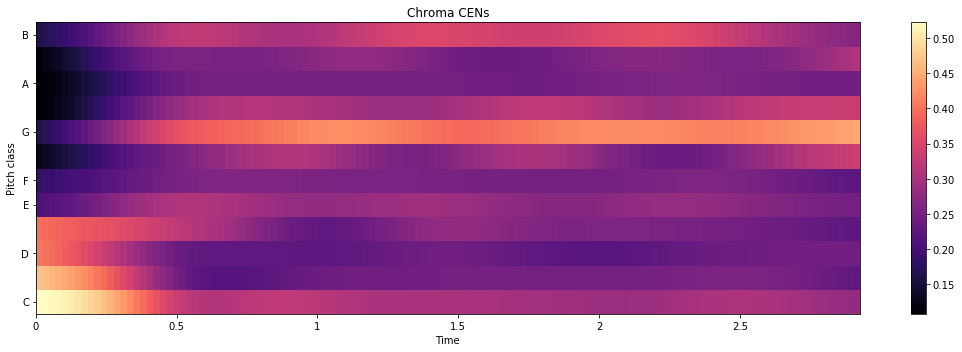

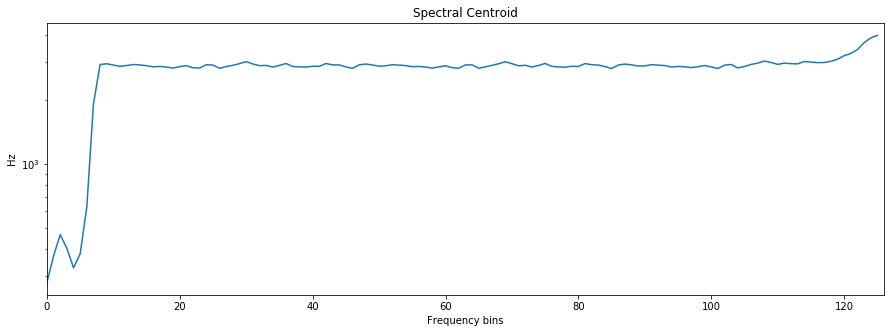

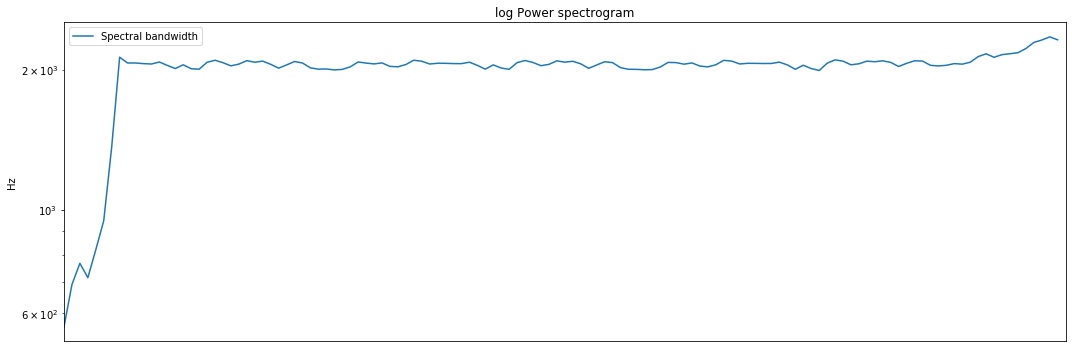

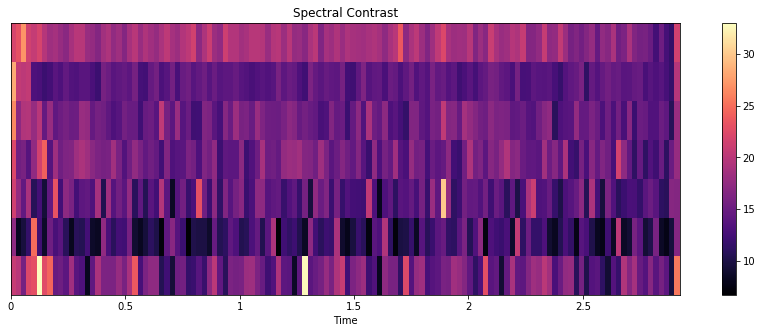

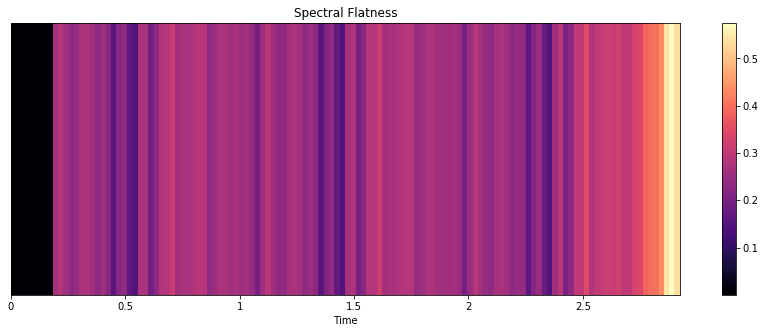

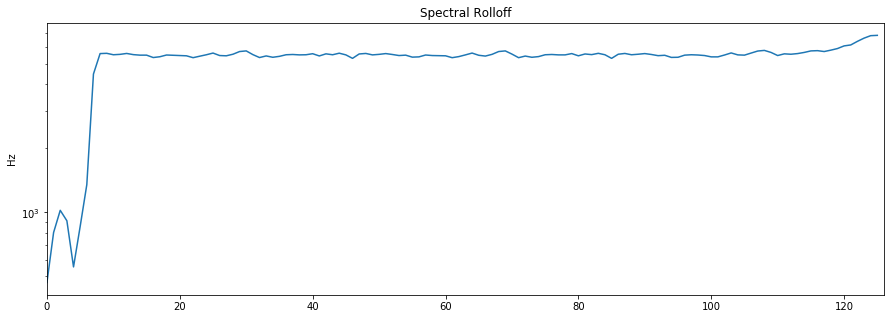

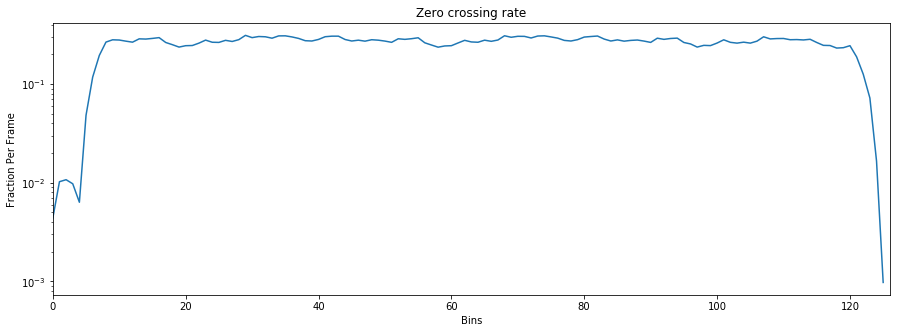

In [82]:
index = 0
plt.figure(index,figsize=(15,5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.5)
plt.title('Harmonic')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Percussive')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(mfcc_delta, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients Delta')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram STFT')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(chroma_cQ, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram Constant Q')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.title('Chroma CENs')
plt.colorbar()
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(centroid.T, label='Spectral Centroid')
plt.ylabel('Hz')
plt.xticks(np.arange(0,centroid.shape[-1],20))
plt.xlim([0, centroid.shape[-1]])
plt.xlabel('Frequency bins')
plt.title('Spectral Centroid')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(spec_bandwidth.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bandwidth.shape[-1]])
plt.legend()
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(spec_contrast,x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(spec_flatness,x_axis='time')
plt.colorbar()
plt.title('Spectral Flatness')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(spectral_rolloff.T)
plt.ylabel('Hz')
plt.xticks(np.arange(0,spec_rolloff.shape[-1],20))
plt.xlim([0, centroid.shape[-1]])
plt.title('Spectral Rolloff')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(zero_crossing_rate.T, label='Fraction')
plt.ylabel('Fraction Per Frame')
plt.xlabel('Bins')
plt.xticks(np.arange(0, zero_crossing_rate.shape[-1], 20))
plt.xlim([0, spec_rolloff.shape[-1]])
plt.title("Zero crossing rate")
plt.show()